# GENSIM LDA Visualization

### 1. Import the libraries

In [18]:
import logging
import re
import json
import os
import glob
from collections import namedtuple

import numpy as np
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.model_selection import train_test_split
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
%matplotlib inline

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


### 2. Enable logging

In [2]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


### 3. Input text for LDA topic modelling

In [3]:
texts = [['human', 'interface', 'computer'],
         ['survey', 'user', 'computer', 'system', 'response', 'time'],
         ['eps', 'user', 'interface', 'system'],
         ['system', 'human', 'system', 'eps'],
         ['user', 'response', 'time'],
         ['trees'],
         ['graph', 'trees'],
         ['graph', 'minors', 'trees'],
         ['graph', 'minors', 'survey']]

### 4. Generate the dictionary and MM_Corpus using GENSIM toolkit

In [4]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:built Dictionary(12 unique tokens: [u'minors', u'graph', u'system', u'trees', u'eps']...) from 9 documents (total 29 corpus positions)


### 5. Run LDA Mutlicore using Gensim over a distribution of 10 topics - [1,2,..10] 

#### <font color=green>Run for 2 different models with 50 iterations (goodLDA) and 1 iteration (badLDA)</font>

In [13]:
gModels = dict()
bModels = dict()
for i in range(1,11,1):
    logging.debug("Running LDA models for number of topics: {0}\n\n".format(i))
    gModels[i] = LdaMulticore(corpus=corpus, id2word=dictionary, passes =1 ,iterations=50, num_topics=i)
    bModels[i] = LdaMulticore(corpus=corpus, id2word=dictionary, passes =20, iterations=50, num_topics=i)

DEBUG:root:Running LDA models for number of topics: 1


INFO:gensim.models.ldamodel:using symmetric alpha at 1.0
INFO:gensim.models.ldamodel:using symmetric eta at 1.0
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 1 topics, 1 passes over the supplied corpus of 9 documents, updating every 14000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 7 processes
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamultic

DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.122*"system" + 0.098*"user" + 0.098*"graph" + 0.098*"trees" + 0.073*"eps" + 0.073*"computer" + 0.073*"time" + 0.073*"interface" + 0.073*"response" + 0.073*"human"
INFO:gensim.models.ldamodel:topic diff=0.000000, rho=0.447214
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-2.714 per-word bound, 6.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 5, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations

DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic diff=0.000000, rho=0.277350
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-2.714 per-word bound, 6.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 13, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (1.000): 0.122*"system" + 0.098*"user" + 0.098*"graph" + 0.098*"trees" + 0.073*"eps" + 0.073*"computer" + 0.073*"time" + 0.073*"interface" + 0.073*"response" + 0.073*"human

DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:6/9 documents converged within 50 iterations
DEBUG:gensim

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.178*"system" + 0.137*"user" + 0.099*"eps" + 0.098*"response" + 0.097*"time" + 0.090*"human" + 0.090*"interface" + 0.088*"computer" + 0.059*"survey" + 0.021*"trees"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.218*"graph" + 0.218*"trees" + 0.156*"minors" + 0.095*"survey" + 0.049*"computer" + 0.047*"interface" + 0.046*"human" + 0.035*"user" + 0.035*"time" + 0.035*"response"
INFO:gensim.models.ldamodel:topic diff=0.086124, rho=0.447214
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-2.889 per-word bound, 7.4 perplexity estimate based on a held-out corpus 

INFO:gensim.models.ldamodel:-2.879 per-word bound, 7.4 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 11, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.174*"system" + 0.135*"user" + 0.096*"eps" + 0.096*"response" + 0.096*"time" + 0.096*"human" + 0.096*"interface" + 0.096*"computer" + 0.057*"survey" + 0.020*"trees"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.500): 0.231*"graph" + 0.230*"trees" + 0.165*"minors" + 0.101*"survey" 

INFO:gensim.models.ldamodel:topic diff=0.000768, rho=0.235702
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-2.879 per-word bound, 7.4 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 18, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.500): 0.173*"system" + 0.135*"user" + 0.096*"eps" + 0.096*"response" + 0.096*"time" + 0.096*"computer" + 0.096*"human" + 0.096*"interface" + 0.057*"survey" + 0.020*"trees"
DEBUG:gensim.models.ldamulticore:getting a new j

DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.235 per-word bound, 9.4 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.152*"user" + 0.144*"response" + 0.144*"time" + 0.139*"computer" + 0.087*"system" + 0.083*"survey" + 0.083*"interface" + 0.075*"human" + 0.026*"eps" + 0.024*"trees"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.245*"system"

INFO:gensim.models.ldamodel:topic #2 (0.333): 0.257*"graph" + 0.253*"trees" + 0.179*"minors" + 0.103*"survey" + 0.026*"human" + 0.026*"interface" + 0.026*"computer" + 0.026*"user" + 0.026*"system" + 0.026*"time"
INFO:gensim.models.ldamodel:topic diff=0.015215, rho=0.377964
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.071 per-word bound, 8.4 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.1

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.279*"system" + 0.192*"eps" + 0.113*"human" + 0.113*"interface" + 0.109*"user" + 0.028*"trees" + 0.028*"graph" + 0.028*"minors" + 0.028*"survey" + 0.028*"computer"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.256*"graph" + 0.256*"trees" + 0.179*"minors" + 0.102*"survey" + 0.026*"human" + 0.026*"interface" + 0.026*"user" + 0.026*"computer" + 0.026*"system" + 0.026*"time"
INFO:gensim.models.ldamodel:topic diff=0.001271, rho=0.277350
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.071 per-word bound, 8.4 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 13, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterat

DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.147*"user" + 0.147*"response" + 0.147*"time" + 0.147*"computer" + 0.084*"survey" + 0.082*"interface" + 0.082*"human" + 0.081*"system" + 0.021*"trees" + 0.021*"graph"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.279*"system" + 0.192*"eps" + 0.113*"human" + 0.113*"interface" + 0.109*"user" + 0.028*"trees" + 0.028*"survey" + 0.028*"computer" + 0.028*"graph" + 0.028*"minors"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.256*"graph" + 0.256*"trees" + 0.179*"minors" + 0.102*"survey" + 0.026*"human" + 0.026*"interface" + 0.026*"user" + 0.026*"system" + 0.026*"computer" + 0.026*"time"
INFO:gensim.models.ldamodel:topic diff=0.000192, rho=0.229416
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.071 per-word bound, 8.4 perplexity estimate based on a held-out corpus of 9 doc

INFO:gensim.models.ldamodel:topic diff=1.816745, rho=1.000000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.416 per-word bound, 10.7 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 1, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.265*"graph" + 0.238*"trees" + 0.202*"minors" + 0.112*"survey" + 0.023*"system" + 0.023*"user" + 0.023*"eps" + 0.023*"human" + 0.023*"time" + 0.023*"interface"
IN

DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.264 per-word bound, 9.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 6, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.271*"graph" + 0.269*"trees" + 0.188*"minors" + 0.105*"survey" + 0.021*"system" + 0.021*"human" + 0.021*"interface" + 0.021*"user" + 0.021*"eps" + 0.021*"computer"
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.213*"system" + 0.163*"user" + 0.113*"response" + 0.113*"time" + 0.113*"eps" + 0.062*"survey" + 0.062*"comput

INFO:gensim.models.ldamodel:-3.263 per-word bound, 9.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 11, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.271*"graph" + 0.271*"trees" + 0.188*"minors" + 0.104*"survey" + 0.021*"human" + 0.021*"interface" + 0.021*"computer" + 0.021*"eps" + 0.021*"user" + 0.021*"time"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.213*"system" + 0.163*"user" + 0.113*"response" + 0.113*"time" + 0

INFO:gensim.models.ldamulticore:PROGRESS: pass 16, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.250): 0.271*"graph" + 0.271*"trees" + 0.187*"minors" + 0.104*"survey" + 0.021*"human" + 0.021*"interface" + 0.021*"computer" + 0.021*"time" + 0.021*"response" + 0.021*"eps"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.250): 0.213*"system" + 0.163*"user" + 0.113*"response" + 0.113*"time" + 0.113*"eps" + 0.063*"survey" + 0.062*"computer" + 0.062*"human" + 0.062*"interface" + 0.013*"trees"
INFO:gensim.models.ldamodel:

DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.143*"graph" + 0.143*"trees" + 0.142*"user" + 0.142*"response" + 0.142*"minors" + 0.142*"time" + 0.024*"system" + 0.024*"interface" + 0.024*"human" + 0.024*"computer"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.085*"trees" + 0.085*"graph" + 0.084*"user" + 0.083*"minors" + 0.083*"human" + 0.083*"interface" + 0.083*"eps" + 0.083*"system" + 0.083*"time" + 0.083*"computer"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.086*"trees" + 0.085*"graph" + 0.084*"user" + 0.083*"time" + 0.083*"minors" + 0.083*"system" + 0.083*"interface" + 0.083*"eps" 

INFO:gensim.models.ldamodel:topic diff=0.011825, rho=0.577350
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.484 per-word bound, 11.2 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.208*"user" + 0.143*"response" + 0.143*"time" + 0.143*"system" + 0.078*"computer" + 0.078*"survey" + 0.078*"interface" + 0.078*"eps" + 0.013*"trees" + 0.013*"graph"
DEBUG:gensim.models.ldamulticore:getting a new j

DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.353*"trees" + 0.059*"interface" + 0.059*"graph" + 0.059*"eps" + 0.059*"system" + 0.059*"computer" + 0.059*"survey" + 0.059*"time" + 0.059*"user" + 0.059*"minors"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.273*"trees" + 0.272*"graph" + 0.045*"system" + 0.045*"interface" + 0.045*"computer" + 0.045*"survey" + 0.045*"eps" + 0.045*"user" + 0.045*"minors" + 0.045*"response"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.234*"system" + 0.234*"human" + 0.128*"eps" + 0.128*"interface" + 0.128*"computer" + 0.021*"trees" + 0.021*"graph" + 0.021*"minors" + 0.021*"time" + 0.021*"user"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.262*"graph" + 0.262*"minors" + 0.143*"survey" + 0.142*"trees" + 0.024*"interface" + 0.024*"system" + 0.024*"computer" + 0.024*"eps" + 0.024*"user" + 0.024*"time"
INFO:gensim.models.ldamodel:topic diff=0.000317, rho=0.353553
DEBUG:gensim.models.ldamodel:bound: at docum

INFO:gensim.models.ldamodel:topic diff=0.000053, rho=0.288675
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.484 per-word bound, 11.2 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 12, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.208*"user" + 0.143*"response" + 0.143*"time" + 0.143*"system" + 0.078*"computer" + 0.078*"survey" + 0.078*"interface" + 0.078*"eps" + 0.013*"trees" + 0.013*"graph"
DEBUG:gensim.models.ldamulticore:getting a new 

DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.353*"trees" + 0.059*"interface" + 0.059*"eps" + 0.059*"computer" + 0.059*"survey" + 0.059*"graph" + 0.059*"system" + 0.059*"time" + 0.059*"response" + 0.059*"user"
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.273*"trees" + 0.272*"graph" + 0.045*"interface" + 0.045*"eps" + 0.045*"computer" + 0.045*"survey" + 0.045*"system" + 0.045*"response" + 0.045*"time" + 0.045*"user"
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.234*"system" + 0.234*"human" + 0.128*"eps" + 0.128*"interface" + 0.128*"computer" + 0.021*"trees" + 0.021*"survey" + 0.021*"graph" + 0.021*"user" + 0.021*"time"
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.262*"graph" + 0.262*"minors" + 0.143*"survey" + 0.142*"trees" + 0.024*"interface" + 0.024*"eps" + 0.024*"computer" + 0.024*"system" + 0.024*"time" + 0.024*"response"
INFO:gensim.models.ldamodel:topic diff=0.000009, rho=0.242536
DEBUG:gensim.models.ldamodel:bound: at d

DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.309*"trees" + 0.309*"graph" + 0.167*"minors" + 0.024*"user" + 0.024*"system" + 0.024*"computer" + 0.024*"time" + 0.024*"interface" + 0.024*"survey" + 0.024*"human"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.085*"trees" + 0.084*"graph" + 0.083*"user" + 0.083*"system" + 0.083*"minors" + 0.083*"computer" + 0.083*"response" + 0.083*"survey" + 0.083*"t

INFO:gensim.models.ldamodel:topic #4 (0.167): 0.317*"system" + 0.217*"eps" + 0.117*"user" + 0.117*"interface" + 0.117*"human" + 0.017*"trees" + 0.017*"graph" + 0.017*"survey" + 0.017*"computer" + 0.017*"minors"
INFO:gensim.models.ldamodel:topic diff=0.005979, rho=0.577350
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.503 per-word bound, 11.3 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 3, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.2

DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #3 (0.167): 0.389*"trees" + 0.056*"graph" + 0.056*"user" + 0.056*"system" + 0.056*"minors" + 0.056*"interface" + 0.056*"survey" + 0.056*"human" + 0.056*"computer" + 0.056*"eps"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.317*"system" + 0.217*"eps" + 0.117*"user" + 0.117*"interface" + 0.117*"human" + 0.017*"trees" + 0.017*"graph" + 0.017*"survey" + 0.017*"computer" + 0.017*"minors"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.292*"trees" + 0.292*"graph" + 0.042*"user" + 0.042*"human" + 0.042*"system" + 0.042*"interface" + 0.042*"survey" + 0.042*"computer" + 0.042*"minors" + 0.042*"eps"
INFO:gensim.models.ldamodel:topic #1 (0.167): 0.233*"interface" + 0.233*"human" + 0.233*"computer" + 0.033*"trees" + 0.033*"graph" + 0.033*"user" + 0.033*"sys

INFO:gensim.models.ldamodel:topic #5 (0.167): 0.197*"user" + 0.197*"time" + 0.197*"response" + 0.106*"survey" + 0.106*"computer" + 0.106*"system" + 0.015*"trees" + 0.015*"graph" + 0.015*"human" + 0.015*"interface"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.292*"trees" + 0.292*"graph" + 0.042*"user" + 0.042*"human" + 0.042*"survey" + 0.042*"interface" + 0.042*"system" + 0.042*"computer" + 0.042*"minors" + 0.042*"time"
INFO:gensim.models.ldamodel:topic diff=0.000026, rho=0.288675
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.503 per-word bound, 11.3 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 12, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 it

DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #2 (0.167): 0.271*"minors" + 0.271*"graph" + 0.146*"survey" + 0.146*"trees" + 0.021*"user" + 0.021*"human" + 0.021*"interface" + 0.021*"system" + 0.021*"computer" + 0.021*"response"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #4 (0.167): 0.317*"system" + 0.217*"eps" + 0.117*"user" + 0.117*"human" + 0.117*"interface" + 0.017*"trees" + 0.017*"graph" + 0.017*"survey" + 0.017*"computer" + 0.017*"response"
INFO:gensim.models.ldamodel:topic #0 (0.167): 0.292*"trees" + 0.292*"graph" + 0.042*"user" + 0.042*"survey" + 0.042*"human" + 0.042*"interface" 

DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim

INFO:gensim.models.ldamodel:topic #4 (0.143): 0.385*"trees" + 0.255*"graph" + 0.169*"minors" + 0.021*"system" + 0.021*"user" + 0.021*"eps" + 0.021*"human" + 0.021*"response" + 0.021*"time" + 0.021*"computer"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.083*"trees" + 0.083*"graph" + 0.083*"human" + 0.083*"user" + 0.083*"minors" + 0.083*"system" + 0.083*"interface" + 0.083*"time" + 0.083*"survey" + 0.083*"computer"
INFO:gensim.models.ldamodel:topic #6 (0.143): 0.282*"graph" + 0.206*"survey" + 0.205*"minors" + 0.102*"trees" + 0.026*"human" + 0.026*"user" + 0.026*"response" + 0.026*"interface" + 0.026*"system" + 0.026*"eps"
INFO:gensim.models.ldamodel:topic #0 (0.143): 0.083*"trees" + 0.083*"graph" + 0.083*"human" + 0.083*"system" + 0.083*"user" + 0.083*"time" + 0.083*"response" + 0.083*"computer" + 0.083*"minors" + 0.083*"survey"
INFO:gensim.models.ldamodel:topic diff=0.097499, rho=0.577350
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.807 per-word b

INFO:gensim.models.ldamodel:topic diff=0.014844, rho=0.377964
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.776 per-word bound, 13.7 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.406*"trees" + 0.276*"graph" + 0.149*"minors" + 0.019*"system" + 0.019*"user" + 0.019*"eps" + 0.019*"response" + 0.019*"human" + 0.019*"time" + 0.019*"interface"


DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #5 (0.143): 0.214*"system" + 0.146*"computer" + 0.146*"human" + 0.078*"time" + 0.078*"response" + 0.078*"eps" + 0.078*"survey" + 0.078*"interface" + 0.078*"user" + 0.010*"trees"
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.083*"trees" + 0.083*"interface" + 0.083*"eps" + 0.083*"graph" + 0.083*"time" + 0.083*"user" + 0.083*"system" + 0.083*"response" + 0.083*"human" + 0.083*"minors"
INFO:gensim.models.ldamodel:topic #2 (0.143): 0.083*"interface" + 0.083*"trees" + 0.083*"eps" + 0.083*"response" + 0.083*"system" + 0.083*"graph" + 0.083*"time" + 0.083*"user" + 0.083*"survey" + 0.083*"minors"
INFO:gensim.models.ldamodel:topic #1 (0.143): 0.246*"user" + 0.131*"interface" + 0.131*"eps" + 0.131*"response" + 0.131*"time" + 0.131*"system" + 0.016*"trees" + 0.016*"graph" + 0.016*"minors" + 0.016*"human"
INFO:gensim.models.ldamodel:topic diff=0.002102, rho=0.288675
DEBUG:gensim.models.ldamodel:bound: at document

INFO:gensim.models.ldamodel:topic diff=0.000536, rho=0.250000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.774 per-word bound, 13.7 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 16, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #3 (0.143): 0.083*"interface" + 0.083*"eps" + 0.083*"time" + 0.083*"trees" + 0.083*"response" + 0.083*"system" + 0.083*"user" + 0.083*"graph" + 0.083*"minors" + 0.083*"human"
INFO:gensim.models.ldamodel:topic #4 (0.143): 0.40

INFO:gensim.models.ldamulticore:training LDA model using 7 processes
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldam

DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #3 (0.125): 0.083*"trees" + 0.083*"graph" + 0.083*"minors" + 0.083*"system" + 0.083*"interface" + 0.083*"response" + 0.083*"user" + 0.083*"time" + 0.083*"human" + 0.083*"eps"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.185*"user" + 0.185*"system" + 0.098*"time" + 0.098*"response" + 0.098*"computer" + 0.098*"survey" + 0.098*"eps" + 0.098*"interface" + 0.011*"trees" + 0.011*"graph"
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.250*"minors" + 0.250*"survey" + 0.250*"graph" + 0.028*"trees" + 0.028*"user" + 0.028*"system" + 0.028*"interface" + 0.028*"eps" + 0.028*"computer" + 0.028*"time"
INFO:gensim.models.ldamodel:topic #6 (0.125): 0.083*"trees" + 0.083*"graph" + 0.083*"system" + 0.083*"minors" + 0.083*"interface" + 0.083*"eps" + 0.083*"user" + 0.083*"time" + 0.083*"computer" + 0.083*"human"
INFO:gensim.models.ldamodel:topic #0 (0.125): 0.386*"system" + 0.

INFO:gensim.models.ldamodel:topic #2 (0.125): 0.250*"minors" + 0.250*"survey" + 0.250*"graph" + 0.028*"trees" + 0.028*"user" + 0.028*"system" + 0.028*"interface" + 0.028*"eps" + 0.028*"computer" + 0.028*"time"
INFO:gensim.models.ldamodel:topic diff=0.000071, rho=0.377964
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.765 per-word bound, 13.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:getting a new job

DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #2 (0.125): 0.250*"minors" + 0.250*"survey" + 0.250*"graph" + 0.028*"trees" + 0.028*"user" + 0.028*"interface" + 0.028*"system" + 0.028*"eps" + 0.028*"computer" + 0.028*"time"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #5 (0.125): 0.250*"response" + 0.250*"time" + 0.250*"user" + 0.028*"trees" + 0.028*"graph" + 0.028*"system" + 0.028*"minors" + 0.028*"eps" + 0.028*"survey" + 0.028*"human"
INFO:gensim.models.ldamodel:topic #3 (0.125): 0.083*"trees" + 0.083*"graph" + 0.083*"minors" + 0.083*"interface" + 0.083*"system" + 0.083*"eps" + 0.083*"response" + 0.083*"user" + 0.083*"time" + 0.083*"survey"
INFO:gensim.models.ldamodel:topic #4 (0.125): 0.185*"user" + 0.185*"system" + 0.098*"computer" + 0.098*"survey" + 0.098*"response" + 0.098*"time" + 0.098*"eps" + 0.098*"interface" + 0.011*"trees" + 0.011*"graph"
INFO:gensim.models.lda

INFO:gensim.models.ldamodel:topic #7 (0.125): 0.417*"trees" + 0.283*"graph" + 0.150*"minors" + 0.017*"user" + 0.017*"interface" + 0.017*"system" + 0.017*"time" + 0.017*"response" + 0.017*"survey" + 0.017*"human"
INFO:gensim.models.ldamodel:topic diff=0.000002, rho=0.250000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.765 per-word bound, 13.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 16, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #5 (0.125): 0

INFO:gensim.models.ldamulticore:training LDA model using 7 processes
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
INFO:gensim.models.ldamulticore:PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldam

DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.333*"trees" + 0.333*"graph" + 0.033*"system" + 0.033*"user" + 0.033*"interface" + 0.033*"response" + 0.033*"computer" + 0.033*"eps" + 0.033*"survey" + 0.033*"minors"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #1 (0.111): 0.256*"graph" + 0.256*"trees" + 0.256*"minors" + 0.026*"system" + 0.026*"time" + 0.026*"user" + 0.026*"response" + 0.026*"interface" + 0.026*"computer" + 0.026*"eps"
INFO:gensim.models.ldamodel:topic #4 (0.111): 0.256*"user" + 0.256*"time" + 0.256*"response" + 0.026*"trees" + 0.026*"graph" + 0.026*"system" + 0.026*"survey" + 0.026*"human" + 0.026*"minors" + 0.026*"computer"
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.152*"computer" + 0.152*"user" + 

INFO:gensim.models.ldamodel:topic #5 (0.111): 0.333*"graph" + 0.333*"trees" + 0.033*"system" + 0.033*"user" + 0.033*"interface" + 0.033*"response" + 0.033*"eps" + 0.033*"computer" + 0.033*"survey" + 0.033*"minors"
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.083*"trees" + 0.083*"graph" + 0.083*"user" + 0.083*"human" + 0.083*"minors" + 0.083*"system" + 0.083*"response" + 0.083*"eps" + 0.083*"time" + 0.083*"interface"
INFO:gensim.models.ldamodel:topic diff=0.000031, rho=0.377964
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.002 per-word bound, 16.0 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterat

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:result put
INFO:gensim.models.ldamodel:topic #8 (0.111): 0.152*"computer" + 0.152*"user" + 0.152*"time" + 0.152*"response" + 0.152*"survey" + 0.152*"system" + 0.015*"trees" + 0.015*"graph" + 0.015*"minors" + 0.015*"human"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #5 (0.111): 0.333*"graph" + 0.333*"trees" + 0.033*"system" + 0.033*"user" + 0.033*"eps" + 0.033*"computer" + 0.033*"response" + 0.033*"interface" + 0.033*"survey" + 0.033*"minors"
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.256*"survey" + 0.256*"minors" + 0.256*"graph" + 0.026*"trees" + 0.026*"system" + 0.026*"interface" + 0.026*"response" + 0.026*"time" + 0.026*"user" + 0.026*"eps"
INFO:g

INFO:gensim.models.ldamodel:topic #4 (0.111): 0.256*"user" + 0.256*"time" + 0.256*"response" + 0.026*"trees" + 0.026*"graph" + 0.026*"system" + 0.026*"computer" + 0.026*"survey" + 0.026*"human" + 0.026*"minors"
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.256*"survey" + 0.256*"minors" + 0.256*"graph" + 0.026*"trees" + 0.026*"system" + 0.026*"response" + 0.026*"eps" + 0.026*"interface" + 0.026*"human" + 0.026*"user"
INFO:gensim.models.ldamodel:topic diff=0.000001, rho=0.250000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.002 per-word bound, 16.0 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 16, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterat

INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamulticore:running online LDA training, 10 topics, 1 passes over the supplied corpus of 9 documents, updating every 14000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamulticore:training LDA model using 7 processes
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
DEBUG:gensim.models.ldamulticore:worker process entering E-step loop
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamul

INFO:gensim.models.ldamulticore:PROGRESS: pass 2, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.287*"graph" + 0.287*"minors" + 0.167*"trees" + 0.150*"survey" + 0.014*"system" + 0.014*"human" + 0.014*"user" + 0.014*"response" + 0.014*"interface" + 0.014*"eps"
INFO:gensim.models.ldamodel:topic #2 (0.100): 0.188*"user" + 0.187*"system" + 0.098*"survey" + 0.098*"time" + 0.098*"computer" + 0.098*"response" + 0.098*"eps" + 0.098*"interface" + 0.009*"trees" + 0.009*"graph"
INFO:gensim.models.ldamodel:top

INFO:gensim.models.ldamodel:topic #7 (0.100): 0.083*"trees" + 0.083*"graph" + 0.083*"user" + 0.083*"computer" + 0.083*"interface" + 0.083*"survey" + 0.083*"time" + 0.083*"system" + 0.083*"response" + 0.083*"human"
INFO:gensim.models.ldamodel:topic #3 (0.100): 0.291*"graph" + 0.291*"minors" + 0.154*"trees" + 0.153*"survey" + 0.014*"system" + 0.014*"human" + 0.014*"response" + 0.014*"user" + 0.014*"interface" + 0.014*"eps"
INFO:gensim.models.ldamodel:topic #8 (0.100): 0.262*"interface" + 0.262*"computer" + 0.262*"human" + 0.024*"trees" + 0.024*"graph" + 0.024*"user" + 0.024*"minors" + 0.024*"time" + 0.024*"system" + 0.024*"survey"
INFO:gensim.models.ldamodel:topic diff=0.000407, rho=0.377964
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.938 per-word bound, 15.3 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 7, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1

INFO:gensim.models.ldamulticore:PROGRESS: pass 11, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEBUG:gensim.models.ldamulticore:processing chunk #0 of 9 documents
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations
DEBUG:gensim.models.ldamulticore:processed chunk, queuing the result
DEBUG:gensim.models.ldamulticore:result put
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:topic #6 (0.100): 0.404*"system" + 0.212*"eps" + 0.212*"human" + 0.019*"trees" + 0.019*"graph" + 0.019*"user" + 0.019*"computer" + 0.019*"interface" + 0.019*"response" + 0.019*"time"
DEBUG:gensim.models.ldamulticore:getting a new job
INFO:gensim.models.ldamodel:topic #9 (0.100): 0.083*"trees" + 0.083*"graph" + 0.083*"system" + 0.083*"interface" + 0.083*"survey" + 0.083*"eps" + 0.083*"computer" + 0.083*"user" + 0.083*"human" + 0.083*"time"
INFO:gensim.models.ldamodel:topic

INFO:gensim.models.ldamodel:topic #6 (0.100): 0.404*"system" + 0.212*"eps" + 0.212*"human" + 0.019*"graph" + 0.019*"trees" + 0.019*"user" + 0.019*"computer" + 0.019*"interface" + 0.019*"response" + 0.019*"time"
INFO:gensim.models.ldamodel:topic #7 (0.100): 0.083*"trees" + 0.083*"interface" + 0.083*"graph" + 0.083*"survey" + 0.083*"eps" + 0.083*"system" + 0.083*"computer" + 0.083*"user" + 0.083*"human" + 0.083*"time"
INFO:gensim.models.ldamodel:topic #4 (0.100): 0.083*"trees" + 0.083*"system" + 0.083*"graph" + 0.083*"survey" + 0.083*"user" + 0.083*"eps" + 0.083*"computer" + 0.083*"interface" + 0.083*"response" + 0.083*"time"
INFO:gensim.models.ldamodel:topic diff=0.000010, rho=0.250000
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-3.938 per-word bound, 15.3 perplexity estimate based on a held-out corpus of 9 documents with 29 words
INFO:gensim.models.ldamulticore:PROGRESS: pass 16, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
DEB

### 6. Calculate the perplexity & topic coherence values for good and bad models

In [14]:
goodcm = dict()
badcm = dict()
gPerplex = dict()
bPerplex = dict()
for i in range(1,11,1):
    logging.debug("Calculating Perplexity for number of topics: {0}\n\n".format(i))
    gPerplex[i] = gModels[i].log_perplexity(corpus)
    bPerplex[i] = bModels[i].log_perplexity(corpus)
    logging.debug("Generate topic coherence model for number of topics: {0}\n\n".format(i))
    goodcm[i] = CoherenceModel(model=gModels[i], corpus=corpus, dictionary=dictionary, 
                               coherence='u_mass').get_coherence()
    badcm[i] = CoherenceModel(model=bModels[i], corpus=corpus, dictionary=dictionary, 
                              coherence='u_mass').get_coherence()

    logging.debug("Generate topic coherence model for number of topics: {0}\n\n".format(i))
    goodcm[i] = CoherenceModel(model=gModels[i], corpus=corpus, dictionary=dictionary, 
                               coherence='u_mass').get_coherence()
    badcm[i] = CoherenceModel(model=bModels[i], corpus=corpus, dictionary=dictionary, 
                              coherence='u_mass').get_coherence()
    
# Print perplexity values for good and bad models
print 'Perplexity values for topics [1,2,..,10] for good LDA models:'
pprint(gPerplex)
print 'Perplexity values for topics [1,2,..,10] for bad LDA models:'
pprint(bPerplex)


# Print perplexity values for good and bad models
print 'Topic Coherence values for topics [1,2,..,10] for good LDA models:'
pprint(goodcm)
print 'TOpic Coherence values for topics [1,2,..,10] for bad LDA models:'
pprint(badcm)

DEBUG:root:Calculating Perplexity for number of topics: 1


DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-2.714 per-word bound, 6.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-2.714 per-word bound, 6.6 perplexity estimate based on a held-out corpus of 9 documents with 29 words
DEBUG:root:Generate topic coherence model for number of topics: 1


DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=1, decay=0.5, chunksize=2000)
DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=1, decay=0.5, chunksize=2000)
DEBUG:root:Generate topic coherence model for number of topics: 1


DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=1, decay=0.5, chunksize=2000)
DEBUG:gensim.models.coherence

DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=8, decay=0.5, chunksize=2000)
DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=8, decay=0.5, chunksize=2000)
DEBUG:root:Generate topic coherence model for number of topics: 8


DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=8, decay=0.5, chunksize=2000)
DEBUG:gensim.models.coherencemodel:Setting topics to those of the model: LdaModel(num_terms=12, num_topics=8, decay=0.5, chunksize=2000)
DEBUG:root:Calculating Perplexity for number of topics: 9


DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.037 per-word bound, 16.4 perplexity estimate based on a held-out corpus of 9 documents with 29 words
DEBUG:gensim.models.ldamodel:bound: at document #0
INFO:gensim.models.ldamodel:-4.002 per-word bound, 16.0 perplexity estimate based on a hel

Perplexity values for topics [1,2,..,10] for good LDA models:
{1: -2.714476462068229,
 2: -3.0182097328120263,
 3: -3.250078530147158,
 4: -3.2947522586789626,
 5: -3.814850701733165,
 6: -3.561410359267531,
 7: -3.7296140721977533,
 8: -3.9624155451511514,
 9: -4.036520421504974,
 10: -4.1012585615289625}
Perplexity values for topics [1,2,..,10] for bad LDA models:
{1: -2.714476462068229,
 2: -2.879106968641281,
 3: -3.070724830545228,
 4: -3.2630431241002578,
 5: -3.4835912332270427,
 6: -3.5034074721665216,
 7: -3.7743321759947417,
 8: -3.7646490952064253,
 9: -4.001642423849964,
 10: -3.937609777368348}
Topic Coherence values for topics [1,2,..,10] for good LDA models:
{1: -14.726061108336854,
 2: -14.673842117141104,
 3: -14.658483590318825,
 4: -14.678449675187789,
 5: -14.690429326109165,
 6: -14.689200643963384,
 7: -14.687445383755122,
 8: -14.683057233234472,
 9: -14.695344054692296,
 10: -14.697801418983858}
TOpic Coherence values for topics [1,2,..,10] for bad LDA models:
{

### 6. Create the dataframe for Perplexity & Topic Coherence measurements for good & bad models

In [15]:
data = {'num_topics': gPerplex.keys(), 'glda_Perplexity': gPerplex.values(), 'blda_Perplexity': bPerplex.values(),
        'glda_topic_coh': goodcm.values(), 'blda_topic_coh': badcm.values()}
perp_df = pd.DataFrame.from_dict(data)

In [16]:
perp_df

,blda_Perplexity,blda_topic_coh,glda_Perplexity,glda_topic_coh,num_topics
0,-2.714476,-14.726061,-2.714476,-14.726061,1
1,-2.879107,-14.636982,-3.018210,-14.673842,2
2,-3.070725,-14.650292,-3.250079,-14.658484,3
3,-3.263043,-14.613944,-3.294752,-14.678450,4
4,-3.483591,-14.644968,-3.814851,-14.690429,5
5,-3.503407,-14.676914,-3.561410,-14.689201,6
6,-3.774332,-14.633910,-3.729614,-14.687445,7
7,-3.764649,-14.653108,-3.962416,-14.683057,8
8,-4.001642,-14.680327,-4.036520,-14.695344,9
9,-3.937610,-14.641896,-4.101259,-14.697801,10


### 7. Create the No. of Topics  VS Perplexity Graph for good and bad models

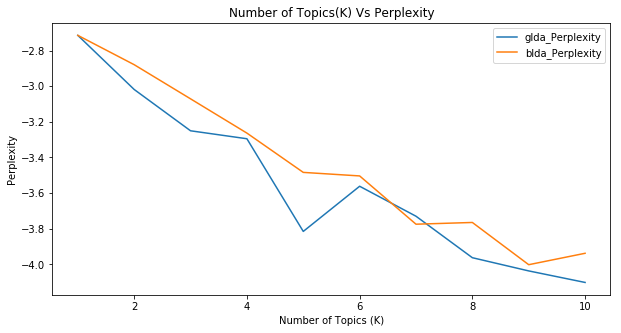

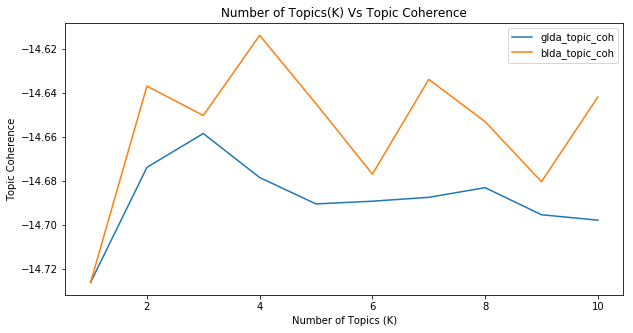

In [17]:
perp_df.plot(x='num_topics', y=['glda_Perplexity', 'blda_Perplexity'], figsize=(10, 5))
plt.xlabel('Number of Topics (K)')
plt.ylabel('Perplexity')
plt.title('Number of Topics(K) Vs Perplexity')
# plt.savefig(OUTPUT_DIR+'/TopicsVsPerplexity_test2.png')
plt.show()
plt.close()

perp_df.plot(x='num_topics', y=['glda_topic_coh', 'blda_topic_coh'], figsize=(10, 5))
plt.xlabel('Number of Topics (K)')
plt.ylabel('Topic Coherence')
plt.title('Number of Topics(K) Vs Topic Coherence')
plt.show()
plt.close()

### 8. PyLDAViz of the good lda model for topics 2 & 5

In [10]:
pyLDAvis.enable_notebook()

#### <font color=green>Visualization for no. of topics = 2</font>

In [11]:
pyLDAvis.gensim.prepare(gModels[2], corpus, dictionary)

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations


PreparedData(topic_coordinates=            Freq  cluster  topics         x    y
topic                                           
1      51.463562        1       1  0.016605  0.0
0      48.536434        1       2 -0.016605  0.0, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
2     Default  3.000000     system  3.000000  12.0000  12.0000
4     Default  2.000000        eps  2.000000  11.0000  11.0000
9     Default  2.000000       time  2.000000  10.0000  10.0000
11    Default  2.000000   response  2.000000   9.0000   9.0000
5     Default  2.000000   computer  2.000000   8.0000   8.0000
3     Default  2.000000      trees  2.000000   7.0000   7.0000
6     Default  2.000000     survey  2.000000   6.0000   6.0000
1     Default  2.000000      graph  2.000000   5.0000   5.0000
10    Default  2.000000  interface  2.000000   4.0000   4.0000
7     Default  2.000000       user  2.000000   3.0000   3.0000
0     Default  2.000000     minors  2.000000   2.0000   2.0000
8     Default  2.000000      human  2.000000   1.0000   1.0000
9      Topic1  1.477914       time  2.189671   0.2712  -2.3124
11     Topic1  1.461033   response  2.186709   0.2610  -2.3239
5      Topic1  1.441700   computer  2.183316   0.2493  -2.3372
3      Topic1  1.845303      trees  2.897581   0.2131  -2.0904
0      Topic1  1.165233     minors  2.134797   0.0588  -2.5501
8      Topic1  1.151761      human  2.132433   0.0483  -2.5617
7      Topic1  1.431446       user  2.824952  -0.0155  -2.3443
10     Topic1  1.063825  interface  2.117001  -0.0238  -2.6411
1      Topic1  1.360718      graph  2.812539  -0.0618  -2.3950
6      Topic1  0.899431     survey  2.088151  -0.1780  -2.8090
4      Topic1  0.629423        eps  2.040766  -0.5120  -3.1660
2      Topic1  0.996647     system  3.392083  -0.5605  -2.7064
2      Topic2  2.395436     system  3.392083   0.3750  -1.7709
4      Topic2  1.411344        eps  2.040766   0.3541  -2.2999
6      Topic2  1.188720     survey  2.088151   0.1595  -2.4716
1      Topic2  1.451822      graph  2.812539   0.0616  -2.2716
10     Topic2  1.053176  interface  2.117001   0.0247  -2.5926
7      Topic2  1.393506       user  2.824952   0.0162  -2.3126
8      Topic2  0.980673      human  2.132433  -0.0539  -2.6640
0      Topic2  0.969565     minors  2.134797  -0.0664  -2.6753
3      Topic2  1.052278      trees  2.897581  -0.2901  -2.5935
5      Topic2  0.741615   computer  2.183316  -0.3569  -2.9434
11     Topic2  0.725675   response  2.186709  -0.3802  -2.9651
9      Topic2  0.711757       time  2.189671  -0.4009  -2.9845, token_table=      Topic      Freq       Term
term                            
5         1  0.458019   computer
5         2  0.458019   computer
4         1  0.490012        eps
4         2  0.490012        eps
1         1  0.355551      graph
1         2  0.355551      graph
8         1  0.468948      human
8         2  0.468948      human
10        1  0.472366  interface
10        2  0.472366  interface
0         1  0.468429     minors
0         2  0.468429     minors
11        1  0.457308   response
11        2  0.457308   response
6         1  0.478893     survey
6         2  0.478893     survey
2         1  0.294804     system
2         2  0.589608     system
9         1  0.456690       time
9         2  0.456690       time
3         1  0.690231      trees
3         2  0.345115      trees
7         1  0.353988       user
7         2  0.353988       user, R=12, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

#### <font color=green>Visualization for no. of topics = 5</font>

In [12]:
pyLDAvis.gensim.prepare(gModels[5], corpus, dictionary)

DEBUG:gensim.models.ldamodel:performing inference on a chunk of 9 documents
DEBUG:gensim.models.ldamodel:9/9 documents converged within 50 iterations


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      41.048496        1       1 -0.117786 -0.078886
0      26.405903        1       2  0.228350 -0.013481
2      15.628971        1       3 -0.086695  0.014157
1      12.345680        1       4 -0.046883  0.097084
4       4.570950        1       5  0.023014 -0.018873, topic_info=     Category      Freq       Term     Total  loglift  logprob
term                                                          
2     Default  3.000000     system  3.000000  12.0000  12.0000
8     Default  2.000000      human  2.000000  11.0000  11.0000
1     Default  2.000000      graph  2.000000  10.0000  10.0000
3     Default  2.000000      trees  2.000000   9.0000   9.0000
10    Default  2.000000  interface  2.000000   8.0000   8.0000
5     Default  2.000000   computer  2.000000   7.0000   7.0000
0     Default  2.000000     minors  2.000000   6.0000   6.0000
4     Default  2.000000        eps  2.000000   5.0000   5.0000
7     Default  2.000000       user  2.000000   4.0000   4.0000
9     Default  2.000000       time  2.000000   3.0000   3.0000
11    Default  2.000000   response  2.000000   2.0000   2.0000
6     Default  2.000000     survey  2.000000   1.0000   1.0000
7      Topic1  2.469296       user  2.993992   0.6977  -1.5729
11     Topic1  1.697021   response  2.219678   0.6219  -1.9480
9      Topic1  1.693457       time  2.219005   0.6201  -1.9501
2      Topic1  1.697964     system  3.630386   0.1305  -1.9474
5      Topic1  0.928871   computer  2.106316   0.0717  -2.5507
10     Topic1  0.926525  interface  2.106011   0.0693  -2.5532
6      Topic1  0.929217     survey  2.120911   0.0652  -2.5503
4      Topic1  0.924448        eps  2.150154   0.0463  -2.5554
0      Topic1  0.157570     minors  2.021992  -1.6616  -4.3248
8      Topic1  0.156416      human  2.037389  -1.6765  -4.3321
3      Topic1  0.163034      trees  2.696958  -1.9155  -4.2907
1      Topic1  0.160244      graph  2.697206  -1.9329  -4.3079
1      Topic2  2.145520      graph  2.697206   1.1027  -1.2723
3      Topic2  2.133365      trees  2.696958   1.0972  -1.2780
0      Topic2  1.476675     minors  2.021992   1.0173  -1.6459
6      Topic2  0.803757     survey  2.120911   0.3613  -2.2542
8      Topic2  0.137324      human  2.037389  -1.3655  -4.0211
10     Topic2  0.137613  interface  2.106011  -1.3965  -4.0190
...       ...       ...        ...       ...      ...      ...
6      Topic3  0.143463     survey  2.120911  -0.8375  -3.4529
9      Topic3  0.143356       time  2.219005  -0.8834  -3.4537
11     Topic3  0.143386   response  2.219678  -0.8835  -3.4535
3      Topic3  0.147866      trees  2.696958  -1.0475  -3.4227
1      Topic3  0.144598      graph  2.697206  -1.0700  -3.4450
7      Topic3  0.143282       user  2.993992  -1.1835  -3.4542
8      Topic4  0.788855      human  2.037389   1.1430  -1.5126
10     Topic4  0.788128  interface  2.106011   1.1090  -1.5135
5      Topic4  0.787429   computer  2.106316   1.1079  -1.5144
0      Topic4  0.134154     minors  2.021992  -0.6210  -3.2842
6      Topic4  0.134330     survey  2.120911  -0.6674  -3.2829
4      Topic4  0.135017        eps  2.150154  -0.6760  -3.2778
9      Topic4  0.134937       time  2.219005  -0.7081  -3.2784
11     Topic4  0.133528   response  2.219678  -0.7189  -3.2889
3      Topic4  0.138623      trees  2.696958  -0.8763  -3.2514
1      Topic4  0.135499      graph  2.697206  -0.8991  -3.2742
7      Topic4  0.134097       user  2.993992  -1.0139  -3.2846
2      Topic4  0.135652     system  3.630386  -1.1951  -3.2731
0      Topic5  0.109689     minors  2.021992   0.1713  -2.4920
8      Topic5  0.109615      human  2.037389   0.1630  -2.4926
10     Topic5  0.109954  interface  2.106011   0.1330  -2.4895
5      Topic5  0.109869   computer  2.106316   0.1320  -2.4903
6      Topic5  0.110144     survey  2.120911   0.1276  -2.4878
4      Topic5  0.110951        eps  2.150154   0.12

### 9.  LDA - 80% corpus

In [87]:
with open('../../output/preprocessed_tweets_with_userid.csv', 'r') as infile:
  df = pd.read_csv(infile, names=['userid', 'tweets'], delimiter='|')
  df['tweets'] = df.tweets.str.replace(r'\W+',' ')
  
df.head()

,userid,tweets
0,932563433605812226,coworker tell ban live north dakota back go b...
1,858771417382387713,today retweet second later reason summary cli...
2,936079485186822144,solve problem professor first class kid macbo...
3,2248326669,create thiswarofmine knew affect people persp...
4,22557879,opinion first month office donald trump tell ...


In [88]:
# Convert the tweet_doc into tweet_tokens and remove non_alphanumeric strings in the tokens

df['tweet_tokens'] = df['tweets'].apply(lambda x: x.split())
#logging.info('Length of total dataset: {}'.format(len(df)))

df.head()

,userid,tweets,tweet_tokens
0,932563433605812226,coworker tell ban live north dakota back go b...,"[coworker, tell, ban, live, north, dakota, bac..."
1,858771417382387713,today retweet second later reason summary cli...,"[today, retweet, second, later, reason, summar..."
2,936079485186822144,solve problem professor first class kid macbo...,"[solve, problem, professor, first, class, kid,..."
3,2248326669,create thiswarofmine knew affect people persp...,"[create, thiswarofmine, knew, affect, people, ..."
4,22557879,opinion first month office donald trump tell ...,"[opinion, first, month, office, donald, trump,..."


In [90]:
df_80, df_20 = train_test_split(df, test_size=0.2)
df_60, df_40 = train_test_split(df, test_size=0.4)

#logging.debug('Length of df_20, df_40, df_60, df_80: {0},{1},{2},{3}'.format(len(df_20), len(df_40), len(df_60), len(df_80)))

In [23]:
OUTPUT_DIR = '../../models/df_80_p30_i50/'
file_dir_extension = os.path.join(OUTPUT_DIR, '*.lda')
for file_name in glob.glob(file_dir_extension):
    print file_name

../../models/df_80_p30_i50/70.lda
../../models/df_80_p30_i50/60.lda
../../models/df_80_p30_i50/10.lda
../../models/df_80_p30_i50/100.lda
../../models/df_80_p30_i50/30.lda
../../models/df_80_p30_i50/20.lda
../../models/df_80_p30_i50/50.lda
../../models/df_80_p30_i50/90.lda
../../models/df_80_p30_i50/80.lda
../../models/df_80_p30_i50/40.lda


In [24]:
dictionary = corpora.Dictionary.load(OUTPUT_DIR + 'data_80.dict')
mm_corpus = corpora.MmCorpus(OUTPUT_DIR + 'data_80.mm')

INFO:gensim.utils:loading Dictionary object from ../../models/df_80_p30_i50/data_80.dict
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': '../../models/df_80_p30_i50/data_80.dict'}
INFO:gensim.utils:loaded ../../models/df_80_p30_i50/data_80.dict
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': '../../models/df_80_p30_i50/data_80.mm.index'}
INFO:gensim.corpora.indexedcorpus:loaded corpus index from ../../models/df_80_p30_i50/data_80.mm.index
INFO:gensim.corpora._mmreader:initializing cython corpus reader from ../../models/df_80_p30_i50/data_80.mm
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': '../../models/df_80_p30_i50/data_80.mm'}
INFO:gensim.corpora._mmreader:accepted corpus with 1733 documents, 377758 features, 4364199 non-zero entries


In [25]:
passes=30
iterations = 50
eval_frame = pd.DataFrame(columns=['Num_Topics','Log_Perplexity_P_{0}_I_{1}'.format(passes, iterations), 
                         'Topic_Coherence(u_mass)_P_{0}_I_{1}'.format(passes, iterations),
                         'Topic_Coherence(c_uci)_P_{0}_I_{1}'.format(passes, iterations),
                         'Topic_Coherence(c_v)_P_{0}_I_{1}'.format(passes, iterations)])

In [104]:
OUTPUT_DIR = '../../models/df_80_p30_i50'
lda = LdaMulticore.load(OUTPUT_DIR+'/100.lda')
coh_model_umass = CoherenceModel(model=lda, corpus=mm_corpus, dictionary=dictionary, coherence='u_mass')
coh_model_uci= CoherenceModel(model=lda, texts=list(df_80['tweet_tokens']), coherence='c_uci')
coh_model_ucv = CoherenceModel(model=lda, texts=list(df_80['tweet_tokens']), coherence='c_v')
eval_frame.loc[len(eval_frame)] = [100, lda.log_perplexity(mm_corpus), coh_model_umass.get_coherence(), 
                                       coh_model_uci.get_coherence(), coh_model_ucv.get_coherence()]

INFO:gensim.utils:loading LdaMulticore object from ../../models/df_80_p30_i50/100.lda
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': '../../models/df_80_p30_i50/100.lda'}
INFO:gensim.utils:loading expElogbeta from ../../models/df_80_p30_i50/100.lda.expElogbeta.npy with mmap=None
INFO:gensim.utils:setting ignored attribute id2word to None
INFO:gensim.utils:setting ignored attribute state to None
INFO:gensim.utils:setting ignored attribute dispatcher to None
INFO:gensim.utils:loaded ../../models/df_80_p30_i50/100.lda
INFO:gensim.utils:loading LdaState object from ../../models/df_80_p30_i50/100.lda.state
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': '../../models/df_80_p30_i50/100.lda.state'}
INFO:gensim.utils:loading sstats from ../../models/df_80_p30_i50/100.lda.state.sstats.npy with mmap=None
INFO:gensim.utils:loaded ../../models/df_80_p30_i50/100.lda.state
DEBUG:smart_open.smart_open_lib:{'kw': {}, 'mode': 'rb', 'uri': '../../models/df_80_p30_i50/100

DEBUG:gensim.topic_coherence.text_analysis:completed batch 3; 256 documents processed (2108423 virtual)
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 256 documents processed (2108423 virtual)
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
DEBUG:gensim.topic_coherence.text_analysis:completed batch 3; 256 documents processed (2167487 virtual)
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 256 documents processed (2167487 virtual)
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
DEBUG:gensim.topic_coherence.text_analysis:completed batch 3; 256 documents processed (2207920 virtual)
DEBUG:

DEBUG:gensim.topic_coherence.text_analysis:completed batch 2; 192 documents processed (1723667 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 2; 192 documents processed (1724328 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 2; 192 documents processed (1683385 virtual)
DEBUG:gensim.topic_coherence.text_analysis:completed batch 3; 197 documents processed (1732544 virtual)
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all batches; 197 documents processed (1732544 virtual)
INFO:gensim.topic_coherence.text_analysis:serializing accumulator to return to master...
INFO:gensim.topic_coherence.text_analysis:accumulator serialized
DEBUG:gensim.topic_coherence.text_analysis:completed batch 3; 256 documents processed (2103196 virtual)
DEBUG:gensim.topic_coherence.text_analysis:observed sentinel value; terminating
DEBUG:gensim.topic_coherence.text_analysis:finished all bat

In [1]:
eval_frame

NameError: name 'eval_frame' is not defined

### Plot the graphs for df_80 - passes=50, iterations50

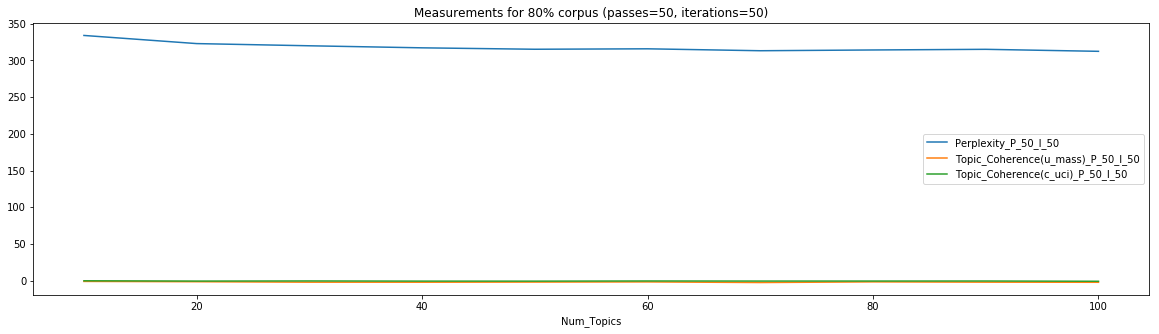

In [65]:
OUTPUT_DIR = '../../models/df_80_p50_i50'
df_80_p50 = pd.read_csv('../../models/df_80_p50_i50/measurements.csv')
df_80_p50['Perplexity_P_50_I_50'] = df_80_p50['Log_Perplexity_P_50_I_50'].apply(lambda x: np.exp2(-x))
df_80_p50.plot(x='Num_Topics', y=['Perplexity_P_50_I_50', 'Topic_Coherence(u_mass)_P_50_I_50', 'Topic_Coherence(c_uci)_P_50_I_50'],
                figsize=(20,5), title='Measurements for 80% corpus (passes=50, iterations=50)')
plt.savefig(OUTPUT_DIR+'/Measurements.png')

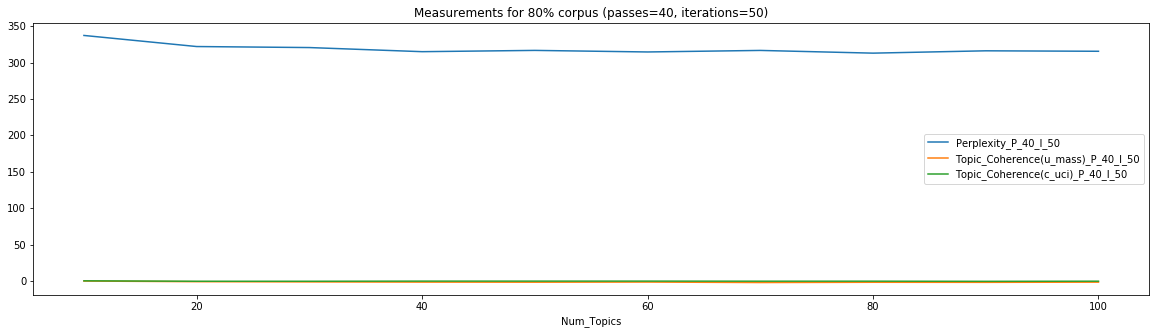

In [46]:
OUTPUT_DIR = '../../models/df_80_p40_i50'
df_80_p40 = pd.read_csv('../../models/df_80_p40_i50/measurements.csv')
df_80_p40['Perplexity_P_40_I_50'] = df_80_p40['Log_Perplexity_P_40_I_50'].apply(lambda x: np.exp2(-x))
df_80_p40.plot(x='Num_Topics', y=['Perplexity_P_40_I_50', 'Topic_Coherence(u_mass)_P_40_I_50', 'Topic_Coherence(c_uci)_P_40_I_50'],
                figsize=(20,5), title='Measurements for 80% corpus (passes=40, iterations=50)')
plt.savefig(OUTPUT_DIR+'/Measurements.png')

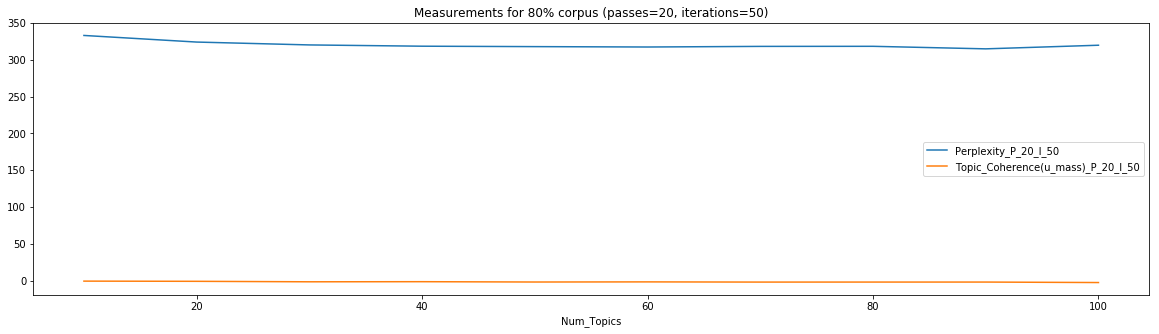

In [62]:
OUTPUT_DIR = '../../models/df_80_p20_iter_50'
df_80_p20 = pd.read_csv('../../models/df_80_p20_iter_50/values.csv')
df_80_p20['Perplexity_P_20_I_50'] = df_80_p20['Log_Perplexity_P_20_I_50'].apply(lambda x: np.exp2(-x))
df_80_p20.plot(x='Num_Topics', y=['Perplexity_P_20_I_50', 'Topic_Coherence(u_mass)_P_20_I_50'],
                figsize=(20,5), title='Measurements for 80% corpus (passes=20, iterations=50)')
plt.savefig(OUTPUT_DIR+'/Measurements.png')

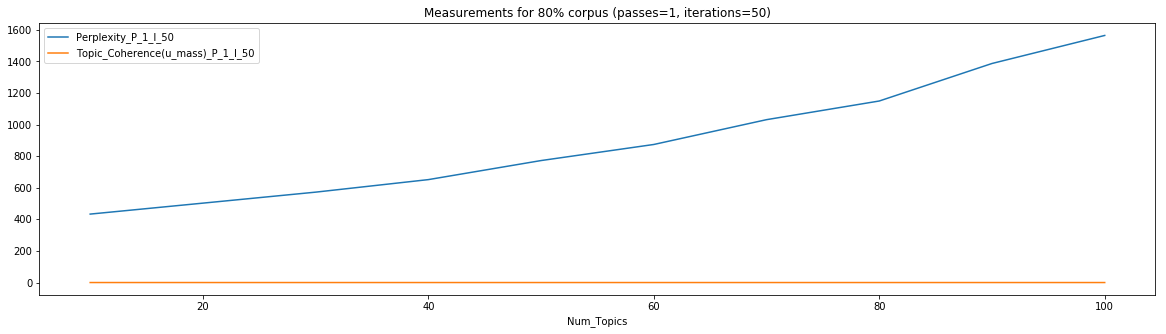

In [63]:
OUTPUT_DIR = '../../models/df_80_p1_iter_50_1'
df_80_p1 = pd.read_csv('../../models/df_80_p1_iter_50_1/values.csv')
df_80_p1['Perplexity_P_1_I_50'] = df_80_p1['Log_Perplexity_P_1_I_50'].apply(lambda x: np.exp2(-x))
df_80_p1.plot(x='Num_Topics', y=['Perplexity_P_1_I_50', 'Topic_Coherence(u_mass)_P_1_I_50'],
                figsize=(20,5), title='Measurements for 80% corpus (passes=1, iterations=50)')
plt.savefig(OUTPUT_DIR+'/Measurements.png')

### Comparing perplexities for 80% corpus

In [67]:
df_p80 = df_80.merge(df_80_p50, on="Num_Topics", left_index=True, right_index=True).merge(df_80_p40, on="Num_Topics", left_index=True, 
                                        right_index=True).merge(df_80_p20, on="Num_Topics", left_index=True, right_index=True).merge(df_80_p1, 
                                                                                                                                     on="Num_Topics", left_index=True, right_index=True)  

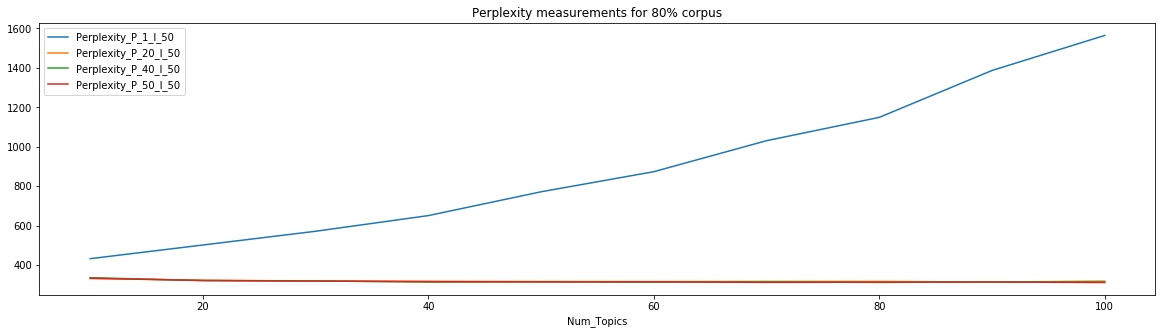

In [68]:
OUTPUT_DIR = '../../output'
df_p80.plot(x='Num_Topics', y=['Perplexity_P_1_I_50', 'Perplexity_P_20_I_50', 'Perplexity_P_40_I_50', 'Perplexity_P_50_I_50'],
                figsize=(20,5), title='Perplexity measurements for 80% corpus')
plt.savefig(OUTPUT_DIR+'/Perplexity_Measurements.png')

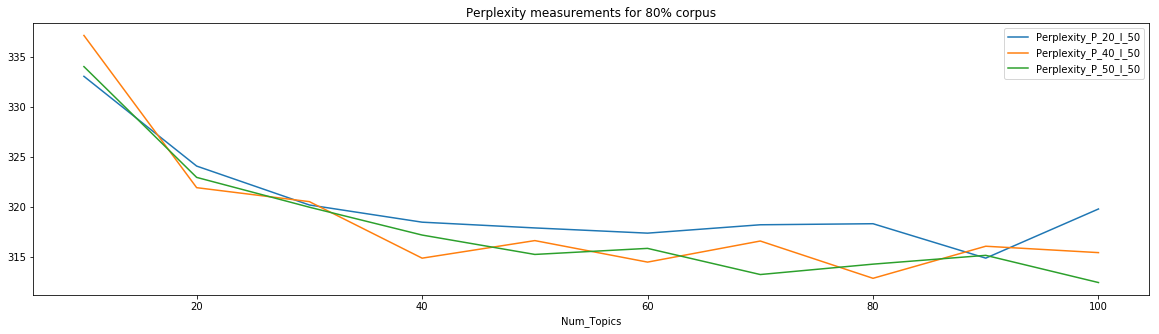

In [69]:
OUTPUT_DIR = '../../output'
df_p80.plot(x='Num_Topics', y=[ 'Perplexity_P_20_I_50', 'Perplexity_P_40_I_50', 'Perplexity_P_50_I_50'],
                figsize=(20,5), title='Perplexity measurements for 80% corpus')
plt.savefig(OUTPUT_DIR+'/Perplexity_Measurements_2.png')

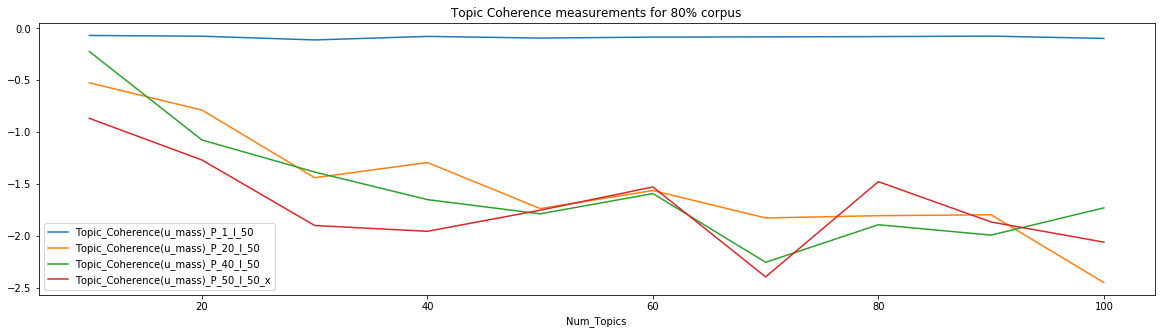

In [77]:
OUTPUT_DIR = '../../output'
df_p80.plot(x='Num_Topics', y=['Topic_Coherence(u_mass)_P_1_I_50', 'Topic_Coherence(u_mass)_P_20_I_50', 'Topic_Coherence(u_mass)_P_40_I_50', 
                               'Topic_Coherence(u_mass)_P_50_I_50_x'],
                figsize=(20,5), title='Topic Coherence measurements for 80% corpus')
plt.savefig(OUTPUT_DIR+'/Top_Coh_Measurements_80.png')

In [73]:
df_p80

,Num_Topics,Log_Perplexity_P_50_I_50_x,Topic_Coherence(u_mass)_P_50_I_50_x,Topic_Coherence(c_uci)_P_50_I_50_x,Log_Perplexity_P_50_I_50_y,Topic_Coherence(u_mass)_P_50_I_50_y,Topic_Coherence(c_uci)_P_50_I_50_y,Perplexity_P_50_I_50,Log_Perplexity_P_40_I_50,Topic_Coherence(u_mass)_P_40_I_50,Topic_Coherence(c_uci)_P_40_I_50,Topic_Coherence(c_v)_P_40_I_50,Perplexity_P_40_I_50,Log_Perplexity_P_20_I_50,Topic_Coherence(u_mass)_P_20_I_50,Perplexity_P_20_I_50,Log_Perplexity_P_1_I_50,Topic_Coherence(u_mass)_P_1_I_50,Perplexity_P_1_I_50
0,10.0,-8.384001,-0.864757,0.012097,-8.384001,-0.864757,0.012097,334.068813,-8.397411,-0.221766,0.120691,0.361966,337.188311,-8.379793,-0.522852,333.095702,-8.759361,-0.067695,433.341525
1,20.0,-8.335302,-1.265985,-0.395870,-8.335302,-1.265985,-0.395870,322.980259,-8.330701,-1.073522,-0.476647,0.376355,321.951723,-8.340352,-0.785635,324.112702,-8.973625,-0.074959,502.724877
2,30.0,-8.321912,-1.895736,-0.226570,-8.321912,-1.895736,-0.226570,319.996446,-8.324421,-1.381581,-0.482339,0.366481,320.553454,-8.322911,-1.436081,320.218196,-9.160678,-0.110802,572.319773
3,40.0,-8.309289,-1.951398,-0.459448,-8.309289,-1.951398,-0.459448,317.208736,-8.298727,-1.646607,-0.307728,0.410169,314.894911,-8.315139,-1.290148,318.497680,-9.348057,-0.076954,651.696651
4,50.0,-8.300436,-1.748856,-0.490762,-8.300436,-1.748856,-0.490762,315.268320,-8.306759,-1.783331,-0.300727,0.406168,316.653089,-8.312527,-1.732643,317.921462,-9.593186,-0.092823,772.390214
5,60.0,-8.303207,-1.525047,-0.256188,-8.303207,-1.525047,-0.256188,315.874291,-8.296918,-1.588619,-0.292723,0.394112,314.500364,-8.310156,-1.559219,317.399485,-9.771834,-0.083548,874.208965
6,70.0,-8.291200,-2.389924,-0.395946,-8.291200,-2.389924,-0.395946,313.256463,-8.306570,-2.249746,-0.408216,0.399070,316.611435,-8.313960,-1.822937,318.237570,-10.010288,-0.081453,1031.328508
7,80.0,-8.295983,-1.474034,-0.357406,-8.295983,-1.474034,-0.357406,314.296627,-8.289460,-1.888428,-0.382831,0.418012,312.878847,-8.314437,-1.801406,318.342792,-10.166806,-0.078584,1149.512460
8,90.0,-8.300018,-1.861767,-0.312366,-8.300018,-1.861767,-0.312366,315.176987,-8.304189,-1.988017,-0.581195,0.406368,316.089456,-8.298741,-1.792500,314.898124,-10.437846,-0.074242,1387.090469
9,100.0,-8.287505,-2.055546,-0.664485,-8.287505,-2.055546,-0.664485,312.455156,-8.301267,-1.726087,-0.405047,0.424599,315.449952,-8.321105,-2.444332,319.817515,-10.611615,-0.096268,1564.639608


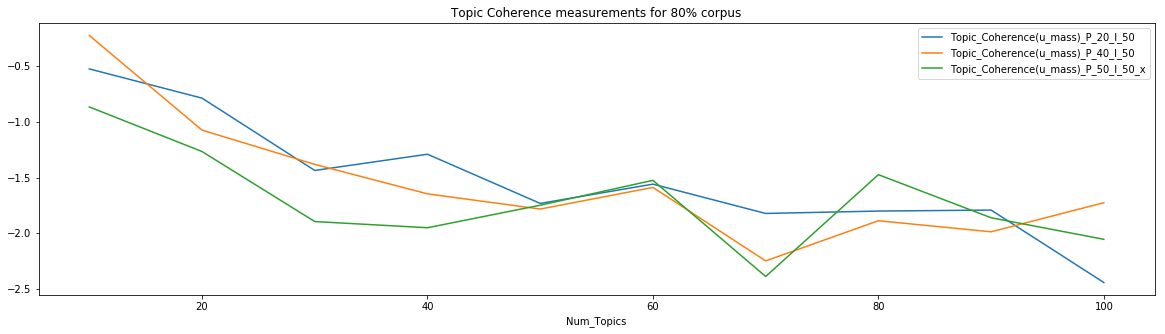

In [78]:
OUTPUT_DIR = '../../output'
df_p80.plot(x='Num_Topics', y=['Topic_Coherence(u_mass)_P_20_I_50', 'Topic_Coherence(u_mass)_P_40_I_50', 
                               'Topic_Coherence(u_mass)_P_50_I_50_x'],
                figsize=(20,5), title='Topic Coherence measurements for 80% corpus')
plt.savefig(OUTPUT_DIR+'/Top_Coh_Measurements_1_80.png')

## 60 % corpus

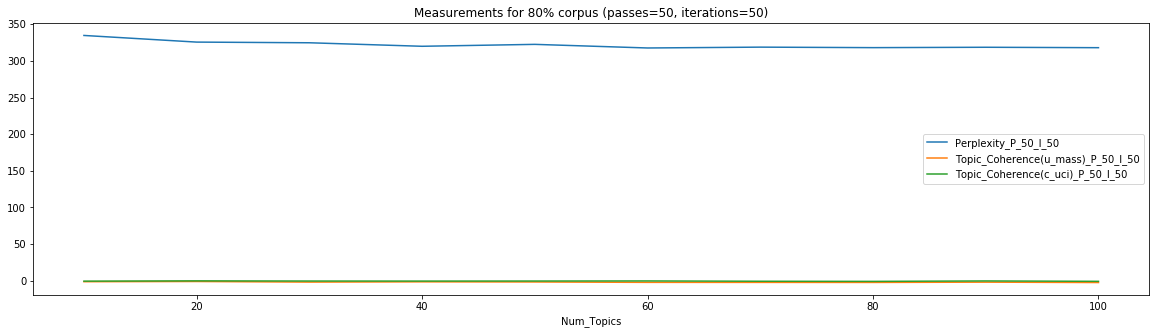

In [79]:
OUTPUT_DIR = '../../models/df_60_p50_i50_1'
df_60_p50 = pd.read_csv('../../models/df_60_p50_i50_1/measurements.csv')
df_60_p50['Perplexity_P_50_I_50'] = df_60_p50['Log_Perplexity_P_50_I_50'].apply(lambda x: np.exp2(-x))
df_60_p50.plot(x='Num_Topics', y=['Perplexity_P_50_I_50', 'Topic_Coherence(u_mass)_P_50_I_50', 'Topic_Coherence(c_uci)_P_50_I_50'],
                figsize=(20,5), title='Measurements for 80% corpus (passes=50, iterations=50)')
plt.savefig(OUTPUT_DIR+'/Measurements.png')

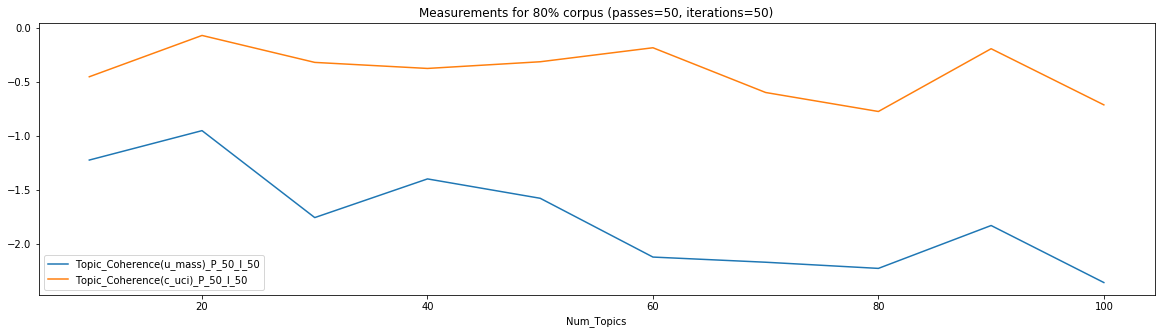

In [81]:
OUTPUT_DIR = '../../models/df_60_p50_i50_1'
df_60_p50 = pd.read_csv('../../models/df_60_p50_i50_1/measurements.csv')
df_60_p50['Perplexity_P_50_I_50'] = df_60_p50['Log_Perplexity_P_50_I_50'].apply(lambda x: np.exp2(-x))
df_60_p50.plot(x='Num_Topics', y=['Topic_Coherence(u_mass)_P_50_I_50', 'Topic_Coherence(c_uci)_P_50_I_50'],
                figsize=(20,5), title='Measurements for 80% corpus (passes=50, iterations=50)')
plt.savefig(OUTPUT_DIR+'/Measurements.png')